In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# import pytorch_lightning as pl

import numpy as np
import random as rn
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import glob

import torch.optim as optim
from tqdm import tqdm

from skimage.transform import rotate, AffineTransform, warp, resize
from skimage.util import random_noise
from skimage.io import imread, imsave

device = torch.device('cuda:1')

In [2]:
path = 'train3/'

def data_list(folder):
    
    data_list = []

    # define paths
    set_path = path + folder
    data_1 = set_path + '/1/'
    data_3 = set_path + '/3/'
    data_6 = set_path + '/6/'
    data_10 = set_path + '/10/'
    data_20 = set_path + '/20/'
    data_30 = set_path + '/30/'
    #print(data_ER_dir)

    # find all images
    data_l1 = []
    data_l3 = []
    data_l6 = []
    data_l10 = []
    data_l20 = []
    data_l30 = []
    
    #create list for data with labels
    for x in glob.glob(data_1 + '*.png'):
        data_l1.append(x)
    
    for x in glob.glob(data_3 + '*.png'):
        data_l3.append(x)
        
    for x in glob.glob(data_6 + '*.png'):
        data_l6.append(x)
        
    for x in glob.glob(data_10 + '*.png'):
        data_l10.append(x)
        
    for x in glob.glob(data_20 + '*.png'):
        data_l20.append(x)
        
    for x in glob.glob(data_30 + '*.png'):
        data_l30.append(x)
        
    
    return data_l1, data_l3, data_l6, data_l10, data_l20, data_l30 

In [62]:
def data_augm(dataset, n, energy):
    
    train_img = []
    train_img_target = []
    
    dataset_new = []
    for i in np.arange(n):
        for d in dataset:
            dataset_new.append(d)

    for img_name in dataset_new:
        #ang = np.random.uniform(0, 360)
        flirp = np.random.uniform(0, 1)
        flipud = np.random.uniform(0, 1)
        #rot = np.random.uniform(0, 1)
        #sigma = np.random.uniform(0, 0.002)
        
        transform = AffineTransform(translation=(np.random.uniform(0, 5),np.random.uniform(0, 5)))
        
        img = imread(img_name)
        img = img/255
        img = resize(img,(64, 64)) 
        #if rot<0.2:
        #    img = rotate(img, angle=180, mode = 'wrap')
        #if flirp<0.2:
            #img = np.fliplr(img)
        #if flipud<0.2:
            #img = np.flipud(img)
        #img = warp(img,transform,mode='wrap')
        #img = random_noise(img,var=sigma**2)
        train_img.append(img)
        target=[]
        num=0
        for e in np.array([1,3,6,10,20,30]):
            if energy == e:
                target=num
            num = num+1
                    
        #target = np.reshape(6,1) 
        train_img_target.append(target)
        
    print(np.shape(train_img_target))
    return train_img, train_img_target
        
def data(dataset, energy):  
    train_img = []
    train_img_target = []
    
    for img_name in dataset:
        img = imread(img_name)
        img = img/255
        img = resize(img,(64, 64))
        train_img.append(img)
        
        target=[]
        num=0
        for e in np.array([1,3,6,10,20,30]):
            if energy == e:
                target=num
            num = num+1
        #target = np.reshape(6,1) 
        train_img_target.append(target)
        
    print(np.shape(train_img_target))
    return train_img, train_img_target

In [4]:
dataN_l1, dataN_l3, dataN_l6, dataN_l10, dataN_l20, dataN_l30 = data_list('NR')
dataE_l1, dataE_l3, dataE_l6, dataE_l10, dataE_l20, dataE_l30 = data_list('ER')

In [95]:
#data1N_X, data1N_y = data(dataN_l1, 1)
#data6N_X, data6N_y = data(dataN_l6, 6)
#data20N_X, data20N_y = data(dataN_l20, 20)

data3N_X, data3N_y = data_augm(dataN_l3, 400, 3)
data10N_X, data10N_y = data_augm(dataN_l10, 400, 10)
data30N_X, data30N_y = data_augm(dataN_l30, 400, 30)

(800,)
(800,)
(800,)


In [94]:
#data3E_X, data3E_y = data(dataE_l3, 3)
#data10E_X, data10E_y = data(dataE_l10, 10)
#data30E_X, data30E_y = data(dataE_l30, 30)

data1E_X, data1E_y = data_augm(dataE_l1, 400, 1)
data6E_X, data6E_y = data_augm(dataE_l6, 400, 6)
data20E_X, data20E_y = data_augm(dataE_l20, 400, 20)

(1200,)
(400,)
(800,)


In [65]:
data3E_X[0]

array([[0.39082446, 0.39297336, 0.3933414 , ..., 0.39031331, 0.39306109,
        0.39266424],
       [0.39457712, 0.39468242, 0.39482561, ..., 0.39160271, 0.39200195,
        0.39045762],
       [0.39221285, 0.3930004 , 0.39455656, ..., 0.39255482, 0.39184451,
        0.38997683],
       ...,
       [0.39416954, 0.39195555, 0.39283156, ..., 0.39340734, 0.39396177,
        0.39368317],
       [0.39449688, 0.39167952, 0.39217095, ..., 0.3942828 , 0.39466133,
        0.39549114],
       [0.39361129, 0.39107884, 0.39399945, ..., 0.39456025, 0.39560616,
        0.39428984]])

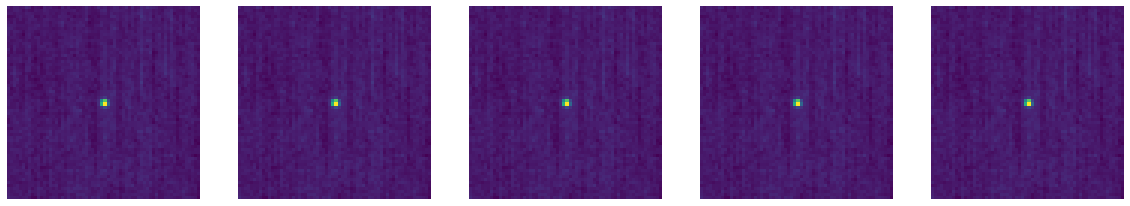

In [96]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(data6E_X[i+30])
    ax[i].axis('off')

In [97]:
data_X = np.concatenate([data1E_X, data3E_X, data6E_X, data10E_X, data20E_X, data30E_X, data1N_X, data3N_X, data6N_X, data10N_X, data20N_X, data30N_X], axis=0)
data_y = np.concatenate([data1E_y, data3E_y, data6E_y, data10E_y, data20E_y, data30E_y, data1N_y, data3N_y, data6N_y, data10N_y, data20N_y, data30N_y], axis=0)

In [98]:
data = list(zip(data_X, data_y))
np.random.shuffle(data)

data_X, data_y = zip(*data)

In [99]:
np.shape(data_X)

(18192, 64, 64)

In [103]:
Ntrain=14000
Nval=4190

train_X = np.array(data_X[0:Ntrain])
train_y = np.array(data_y[0:Ntrain])

val_X = np.array(data_X[Ntrain:Ntrain+Nval])
val_y = np.array(data_y[Ntrain:Ntrain+Nval])


In [104]:
train_X = train_X.reshape(Ntrain, 1, 64, 64)
tr_X  = torch.from_numpy(train_X)
tr_X = tr_X.float()

tr_y = torch.from_numpy(train_y)
tr_y = tr_y.long()

val_X = val_X.reshape(Nval, 1, 64, 64)
vl_X  = torch.from_numpy(val_X)
vl_X = vl_X.float()

vl_y = torch.from_numpy(val_y)
tr_y = tr_y.long()

In [77]:
import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    def __init__(self,
                 in_channels,     # <== number of input channels to the 1st convolution
                 interm_channels, # <== outputs of the 1st / inputs of the 2nd convolution
                 out_channels,    # <== outputs of the 2nd convolution
                 kernel_size,     #
                 pool_size,       
                 use_batchnorm,   # <== whether we'll use batchnorm
                 initialization): # <== function that'll initialize the weights
        
        # First we run the base class constructor
        super(ConvBlock, self).__init__()

        # And then define all the layers used within a block
        self.conv1 = nn.Conv2d(in_channels=in_channels,
                               out_channels=interm_channels,
                               kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=interm_channels,
                               out_channels=out_channels,
                               kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(pool_size)

        self.use_batchnorm = use_batchnorm
        if use_batchnorm:
            self.bn1 = nn.BatchNorm2d(interm_channels)
            self.bn2 = nn.BatchNorm2d(out_channels)

        # If initialization function provided, call it on the weights of the model
        if initialization is not None:
            initialization(self.conv1.weight)
            initialization(self.conv2.weight)

    def forward(self, x):
        x = self.conv1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = F.relu(x)

        x = self.conv2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = F.relu(x)

        x = self.pool(x)
        return x
        
        
# The model itself:
class model(nn.Module):
    def __init__(self, use_batchnorm, initialization, dropout):
        super(model, self).__init__()

        # Convolutional layers:                                                     #576x576
#         self.conv1 = ConvBlock(1, 8, 8, 7,  3, use_batchnorm, initialization)      #192x192
#         self.conv2 = ConvBlock(8, 8, 16, 5, 3, use_batchnorm, initialization)     #64x64
#         self.conv3 = ConvBlock(16, 16, 32, 3, 2, use_batchnorm, initialization)     #32x32     
#         self.conv4 = ConvBlock(32, 32, 64, 3, 2, use_batchnorm, initialization)    #16x16
#         self.conv5 = ConvBlock(64, 64, 64, 3, 2, use_batchnorm, initialization)    #8x8
#         self.conv6 = ConvBlock(64, 64, 64, 1, 2, use_batchnorm, initialization)  #4x4
                                                                                    #64x64
        self.conv1 = ConvBlock(1, 8, 8, 4,  3, use_batchnorm, initialization)      #64x64
        self.conv2 = ConvBlock(8, 8, 16, 5, 2, use_batchnorm, initialization)     #32x32
        self.conv3 = ConvBlock(16, 16, 32, 3, 2, use_batchnorm, initialization)     #16x16     
        self.conv4 = ConvBlock(32, 32, 64, 3, 2, use_batchnorm, initialization)    #8x8
        self.conv5 = ConvBlock(64, 64, 64, 3, 2, use_batchnorm, initialization)    #4x4
        #self.conv6 = ConvBlock(64, 64, 64, 1, 2, use_batchnorm, initialization)  #2x2
        
    
    
        # Fully connected layers:
#         self.bn0 = nn.BatchNorm1d(64*4*4)
#         self.fc1 = nn.Linear(64*4*4, 64)
#         self.dropout1 = nn.Dropout(dropout)
#         self.bn1 = nn.BatchNorm1d(64)
#         self.fc2 = nn.Linear(64, 16)
#         self.dropout2 = nn.Dropout(dropout)
#         self.bn2 = nn.BatchNorm1d(16)
#         self.fc3 = nn.Linear(16, 2)
        self.bn0 = nn.BatchNorm1d(64)
        self.fc1 = nn.Linear(64, 32)
        self.dropout1 = nn.Dropout(dropout)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 6)
        self.dropout2 = nn.Dropout(dropout)
        self.bn2 = nn.BatchNorm1d(6)
        self.fc3 = nn.Linear(6, 6)

        # If initialization function provided, call it on the weights of the model
        if initialization is not None:
            initialization(self.fc1.weight)
            initialization(self.fc2.weight)
            initialization(self.fc3.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        #x = self.conv6(x)
        
        x = x.flatten(1)
        
        x = self.bn0(x)
        x = self.dropout1(self.bn1(F.relu(self.fc1(x))))
        x = self.dropout2(self.bn2(F.relu(self.fc2(x))))
        x = self.fc3(x)
        return x

In [78]:
# defining the model
model = model(True, initialization=(lambda w: torch.nn.init.kaiming_normal_(w, nonlinearity='relu')), dropout=0.).to(device)
# defining the optimizer
#optimizer = optim.Adam(model.parameters(), lr=0.00001)
# defining the loss function
criterion = nn.CrossEntropyLoss()
batch_size = 10
l2_lambda = 0

In [108]:
torch.manual_seed(0)
optimizer = optim.Adam(model.parameters(), lr=0.0002)
# batch size of the model

# number of epochs to train the model
n_epochs = 1

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    energies=[1,3,6,10,20,30]  
    permutation = torch.randperm(tr_X.size()[0])
    permutation_val = torch.randperm(vl_X.size()[0])
    
    training_pred = []
    validation_acc= []
    validation_mae= []
    for i in tqdm(range(0, tr_X.size()[0], batch_size)):

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = tr_X[indices].to(device), tr_y[indices].to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        l2_reg = torch.tensor(0.).to(device)
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss += l2_lambda * l2_reg
            
        _, pred = torch.max(outputs.data, 1)
        
        training_pred.append((pred == batch_y).to(torch.float32).mean().item())
        loss.backward()
        optimizer.step()
        
    for j in range(0, vl_X.size()[0], batch_size):
        indices = permutation_val[j:j+batch_size]
        batch_x_v, batch_y_v = vl_X[indices].to(device), vl_y[indices].to(device)  
        val_outputs = model(batch_x_v)
        _, pred_val = torch.max(val_outputs.data, 1)
        
        validation_acc.append((pred_val == batch_y_v).to(torch.float32).mean().item())
        
        mae = []
        energy_true=0
        energy_pred=0
        #print(pred_val)
        #print(batch_y_v)
        for i in np.arange(len(pred_val)):
            for num in np.arange(6):
                if pred_val[i] == num:
                    energy_pred=energies[num]
                
                    #print(energy_pred)
            for num in np.arange(6):
                if batch_y_v[i] == num:
                    energy_true=energies[num]
                    #print(energy_true)
            mae.append(np.abs(energy_pred-energy_true))
        validation_mae.append(np.average(mae))
        
        
    training_pred = np.average(training_pred)
    validation_acc = np.average(validation_acc)
    validation_mae = np.average(validation_mae)
    print('epoch: \t', epoch, '\t training acc: \t', training_pred, '\t validation acc: \t', validation_acc, '\t validation acc: \t', validation_mae)

100%|███████████████████████████████████████████████████████████████████████████████| 1400/1400 [00:27<00:00, 51.59it/s]


epoch: 	 1 	 training acc: 	 0.995214287170342 	 validation acc: 	 0.9921241076863182 	 validation acc: 	 0.027446300715990454


In [7]:
test_lNR = []

for x in sorted(glob.glob('test2/NR/' + '*.png')):
    test_lNR.append(x)

test_lER = []
for x in sorted(glob.glob('test2/ER/' + '*.png')):
    test_lER.append(x)

test_l = np.concatenate([test_lNR, test_lER])

In [8]:
len(test_l)

16560

In [9]:
test_data, _ = data(test_l, 1)

(16560,)


In [109]:
test_X = np.array(test_data)
len(test_X)

16560

In [110]:
test_X = test_X.reshape(len(test_X), 1, 64, 64)
test_X  = torch.from_numpy(test_X)
test_X = test_X.float()

In [111]:
energies=[1,3,6,10,20,30]  
permutation = np.arange(test_X.size()[0])
energy_pred = []

In [112]:
for i in tqdm(range(0, test_X.size()[0], batch_size)):
    
    if i+batch_size>test_X.size()[0]:
        indices = permutation[i:]
    else:
        indices = permutation[i:i+batch_size]
    batch_x = test_X[indices].to(device)
    
    outputs = model(batch_x)
    _, pred = torch.max(outputs.data, 1)
    for i in np.arange(len(pred)):
        for num in np.arange(6):
            if pred[i] == num:
                energy_pred.append(energies[num])

100%|██████████████████████████████████████████████████████████████████████████████| 1656/1656 [00:07<00:00, 230.15it/s]


In [86]:
energy_pred

[30,
 1,
 30,
 30,
 10,
 20,
 1,
 1,
 6,
 10,
 6,
 30,
 3,
 20,
 10,
 10,
 1,
 1,
 30,
 3,
 30,
 30,
 30,
 6,
 10,
 1,
 10,
 6,
 30,
 6,
 30,
 1,
 30,
 6,
 6,
 20,
 30,
 20,
 30,
 30,
 10,
 20,
 3,
 1,
 10,
 20,
 10,
 1,
 3,
 6,
 10,
 1,
 30,
 10,
 6,
 10,
 3,
 1,
 10,
 10,
 30,
 1,
 1,
 1,
 1,
 10,
 1,
 6,
 6,
 30,
 1,
 6,
 30,
 1,
 3,
 10,
 10,
 30,
 1,
 10,
 3,
 30,
 1,
 30,
 30,
 30,
 30,
 30,
 3,
 6,
 30,
 10,
 6,
 10,
 30,
 10,
 3,
 1,
 30,
 6,
 10,
 6,
 1,
 30,
 30,
 3,
 10,
 10,
 6,
 3,
 1,
 3,
 3,
 6,
 20,
 1,
 30,
 30,
 10,
 30,
 3,
 1,
 3,
 30,
 30,
 1,
 10,
 30,
 6,
 1,
 30,
 30,
 1,
 30,
 10,
 30,
 30,
 30,
 6,
 6,
 6,
 1,
 6,
 6,
 30,
 1,
 10,
 10,
 1,
 1,
 30,
 1,
 3,
 30,
 30,
 3,
 1,
 6,
 1,
 30,
 6,
 30,
 1,
 6,
 10,
 1,
 30,
 3,
 1,
 30,
 30,
 30,
 30,
 10,
 30,
 6,
 3,
 30,
 6,
 10,
 10,
 30,
 10,
 30,
 20,
 3,
 30,
 30,
 30,
 10,
 10,
 3,
 10,
 10,
 30,
 1,
 30,
 6,
 10,
 20,
 10,
 20,
 10,
 30,
 30,
 1,
 10,
 1,
 6,
 10,
 1,
 30,
 6,
 10,
 10,
 30,
 30,
 30,
 10,


In [113]:
energy_pred

[30,
 1,
 30,
 30,
 10,
 20,
 1,
 1,
 6,
 10,
 6,
 30,
 6,
 20,
 10,
 10,
 1,
 1,
 30,
 3,
 30,
 30,
 30,
 6,
 10,
 1,
 10,
 6,
 30,
 6,
 30,
 1,
 20,
 6,
 6,
 20,
 30,
 20,
 30,
 30,
 10,
 20,
 3,
 1,
 10,
 20,
 10,
 1,
 3,
 6,
 10,
 1,
 30,
 10,
 6,
 20,
 3,
 1,
 10,
 10,
 30,
 3,
 1,
 1,
 1,
 10,
 1,
 6,
 3,
 20,
 1,
 6,
 30,
 1,
 3,
 6,
 20,
 30,
 1,
 10,
 6,
 30,
 1,
 20,
 30,
 30,
 30,
 30,
 3,
 6,
 30,
 10,
 6,
 10,
 30,
 10,
 3,
 1,
 30,
 6,
 10,
 6,
 1,
 30,
 30,
 3,
 10,
 10,
 6,
 1,
 1,
 3,
 6,
 6,
 20,
 1,
 30,
 30,
 10,
 30,
 3,
 1,
 6,
 30,
 20,
 1,
 10,
 30,
 6,
 1,
 20,
 30,
 1,
 30,
 10,
 30,
 30,
 30,
 6,
 6,
 6,
 1,
 6,
 6,
 30,
 3,
 10,
 10,
 1,
 1,
 20,
 1,
 3,
 20,
 30,
 1,
 1,
 10,
 1,
 30,
 10,
 30,
 1,
 6,
 10,
 1,
 30,
 3,
 1,
 20,
 30,
 30,
 30,
 10,
 30,
 6,
 6,
 30,
 6,
 10,
 10,
 30,
 10,
 30,
 20,
 3,
 30,
 30,
 30,
 10,
 10,
 3,
 10,
 10,
 30,
 1,
 30,
 6,
 10,
 20,
 10,
 20,
 10,
 30,
 30,
 1,
 10,
 1,
 6,
 6,
 1,
 30,
 3,
 10,
 10,
 30,
 30,
 30,
 10,


In [114]:
import os
pred_part=[]
idx = 0
for filename in test_l:
    base=os.path.basename(filename)
    pred_part.append([os.path.splitext(base)[0], energy_pred[idx]])
    idx = idx+1

In [115]:
len(pred_part)

16560

In [116]:
import pandas as pd 

In [117]:
df = pd.DataFrame(data=pred_part, columns=["id", "energy"])

In [118]:
df.head()

,id,energy
0,0007520c8d8efade8feaafbf74fc7d206cdf229d,30
1,000804a189f630cd980ff1543c0ef99d48cd6b34,1
2,000eb12def5371089743dcfe401a8e399f5883fc,30
3,0010e112a8aaadba9b9407b781a98d8dee639082,30
4,0017ba314c74d87184e778b50b34173c4c8810dc,10


In [119]:
df.to_csv("pred6.csv", index=False)

In [130]:
df1= pd.read_csv("pred.csv")
df2= pd.read_csv("pred2.csv")

df3= pd.read_csv("pred5.csv")
df4= pd.read_csv("pred6.csv")

In [126]:
df1.head()

,id,energy
0,0007520c8d8efade8feaafbf74fc7d206cdf229d,30
1,000804a189f630cd980ff1543c0ef99d48cd6b34,1
2,000eb12def5371089743dcfe401a8e399f5883fc,30
3,0010e112a8aaadba9b9407b781a98d8dee639082,30
4,0017ba314c74d87184e778b50b34173c4c8810dc,10


In [131]:
test1 = df1.to_numpy()
test2 = df2.to_numpy()
test3 = df3.to_numpy()
test4 = df4.to_numpy()

In [135]:
np.shape(test1)

(16560, 2)

In [139]:
test_medians = []
for index in range(len(test1)):
    median_index = np.median([test1[index, 1], test2[index, 1], test3[index, 1], test4[index, 1]])
    test_medians.append([test1[index, 0], median_index])

In [140]:
test_medians

[['0007520c8d8efade8feaafbf74fc7d206cdf229d', 30.0],
 ['000804a189f630cd980ff1543c0ef99d48cd6b34', 1.0],
 ['000eb12def5371089743dcfe401a8e399f5883fc', 30.0],
 ['0010e112a8aaadba9b9407b781a98d8dee639082', 30.0],
 ['0017ba314c74d87184e778b50b34173c4c8810dc', 10.0],
 ['001ec8f4d2679f2899a63e4b2597c0a10bd9393f', 20.0],
 ['002721e996690a2d080ac7cacd8436a869cdfb4a', 1.0],
 ['002bdf79e49ef4401589c14318ab6f2923c4dabc', 1.0],
 ['002d06fc315a408d8f5f950fc7b6863f9bc83571', 6.0],
 ['002e090da32d867b0c9670301f400aba01ed5a4b', 10.0],
 ['00327390bfd6101b87106e96e0efc1c938690e1f', 6.0],
 ['003ca27cec612cad61746feb224ef30457da5603', 30.0],
 ['0046676780d5b9399cb5724d450e6e8b30823d06', 4.5],
 ['00573dde8addbac780cfa35a55a790fa1aa45178', 20.0],
 ['0070afb554e778d763810aae4d726849b7d212b3', 10.0],
 ['0075dbee88a58ee3509ec8d815a9d55518ededc8', 8.0],
 ['007d5f355b6c12c5f7e8eef776a59439a71e3c81', 1.0],
 ['008767d2b7cf5529965fecbb6b4146927996112e', 1.0],
 ['0097ce954720c878286591fdd86cdb71f2850717', 30.0],
 [

In [141]:
df = pd.DataFrame(data=test_medians, columns=["id", "energy"])

In [145]:
df.head(20)

,id,energy
0,0007520c8d8efade8feaafbf74fc7d206cdf229d,30.0
1,000804a189f630cd980ff1543c0ef99d48cd6b34,1.0
2,000eb12def5371089743dcfe401a8e399f5883fc,30.0
3,0010e112a8aaadba9b9407b781a98d8dee639082,30.0
4,0017ba314c74d87184e778b50b34173c4c8810dc,10.0
5,001ec8f4d2679f2899a63e4b2597c0a10bd9393f,20.0
6,002721e996690a2d080ac7cacd8436a869cdfb4a,1.0
7,002bdf79e49ef4401589c14318ab6f2923c4dabc,1.0
8,002d06fc315a408d8f5f950fc7b6863f9bc83571,6.0
9,002e090da32d867b0c9670301f400aba01ed5a4b,10.0


In [146]:
df.to_csv("pred_f.csv", index=False)